In [10]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Input,Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import  keras

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


In [14]:
# Step 1: Set dataset directory
from pathlib import Path
parent_dir = Path("/kaggle/input/brain-mri-images-for-brain-tumor-detection")

# Step 2: Initialize lists
filepaths = []
labels = []

# Step 3: Go through 'yes' and 'no' folders
for label_name in ["yes", "no"]:
    folder_path = parent_dir / label_name
    if folder_path.is_dir():
        for image_file in folder_path.glob("*"):
            if not image_file.name.startswith("."):  # skip hidden files
                filepaths.append(image_file)
                labels.append(label_name)

# Step 4: Create a DataFrame
df = pd.DataFrame({"filepath": filepaths, "label": labels})

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['filepath'], df['label'], test_size=0.2, random_state=42)

In [29]:
# (X_train,y_train),(X_test,y_test) = datasets.boston_housing.load_data()



# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

# X_train.shape

(404, 13)

In [30]:
X_test.shape

(102, 13)

In [50]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64, 64, 3)), # Corrected input shape
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     layers.Flatten(),#input layer
#     layers.Dense(64,activation='relu'),#hidden layer
#     layers.Dense(2,activation='softmax') #output layer, changed to 2 for binary classification
# ]
# )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [53]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define image size
IMG_WIDTH = 64
IMG_HEIGHT = 64

# Function to load and preprocess images
def load_and_preprocess_image(filepath):
    img = load_img(filepath, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Load and preprocess all images
all_images = np.array([load_and_preprocess_image(str(filepath)) for filepath in df['filepath']])

# Convert labels to numerical format
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
X_train_images, X_test_images, y_train_encoded, y_test_encoded = train_test_split(
    all_images, all_labels_encoded, test_size=0.2, random_state=42
)


In [55]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train_images, y_train_encoded, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6604 - loss: 1.1457
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6727 - loss: 0.6702
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6216 - loss: 0.6045
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7882 - loss: 0.5288
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7857 - loss: 0.4854
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8108 - loss: 0.4604
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7972 - loss: 0.4707
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8360 - loss: 0.4121
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8528 - loss: 0.3589
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8054 - loss: 0.4037


In [57]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(f'Class: {y[index]}')
    plt.show()

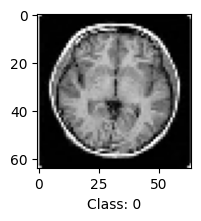

In [64]:
plot_sample(X_test_images,y_test_encoded,5)